<a href="https://colab.research.google.com/github/KenanaSa99/DNA-Sequencing-Classifier/blob/main/DNASequenceClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Human_data = pd.read_table('human.txt')
Human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [3]:
Dog_data = pd.read_table('dog.txt')
Dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [4]:
Chimpanzee_data = pd.read_table('chimpanzee.txt')
Chimpanzee_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Biological sequences, such as DNA, RNA, or proteins, vary in length, which poses a challenge for algorithms that require fixed-length input vectors. k-mers help in transforming these variable-length sequences into fixed-length feature vectors.

In classifying sequences, such as distinguishing between different species or conditions (e.g., healthy vs. diseased), k-mers serve as features for training machine learning models.



In [5]:
('''The getKmers function takes an input sequence and generates all possible
k-mers (substrings of a specified length) from it,converting them to lowercase for consistency.
This is particularly useful in bioinformatics for analyzing DNA, RNA, or protein sequences.''')

def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [6]:
Human_data['words'] = Human_data.apply(lambda x: getKmers(x['sequence']), axis=1) #Generate k-mers from the sequence column and store them in a new words column.
Human_data = Human_data.drop('sequence', axis=1) #Drop the original sequence column.
Human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [7]:
Chimpanzee_data['words'] = Chimpanzee_data.apply(lambda x: getKmers(x['sequence']), axis=1)
Chimpanzee_data = Chimpanzee_data.drop('sequence',axis=1)
Chimpanzee_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [8]:
Dog_data['words'] = Dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
Dog_data = Dog_data.drop('sequence', axis=1)
Dog_data.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


Preparing the data for text processing

Prepare the Data:

    Convert sequences to space-separated k-mers.
    Extract labels.

In [9]:
human_texts = list(Human_data['words']) #Convert words Column to List of Strings
for item in range(len(human_texts)):    #Join k-mers into Single Strings
    human_texts[item] = ' '.join(human_texts[item])
y_human = Human_data.iloc[:, 0].values  #Extract Labels

Now, human_texts contains the sequences as space-separated k-mers, and y_data contains the corresponding labels.
This format is suitable for further text-based analysis or machine learning model training.

In [10]:
print(human_texts[4])

atgcaa tgcaac gcaaca caacag aacagc acagca cagcat agcatt gcattt catttt attttg ttttga tttgaa ttgaat tgaatt gaattt aatttg atttga tttgaa ttgaat tgaata gaatac aatacc atacca taccag accaga ccagac cagacc agacca gaccaa accaaa ccaaag caaagt aaagtg aagtgg agtgga gtggat tggatg ggatgg gatggt atggtg tggtga ggtgag gtgaga tgagat gagata agataa gataat ataatc taatcc aatcct atcctt tccttc ccttca cttcat ttcatc tcatct catctt atcttt tcttta ctttat tttatg ttatga tatgac atgaca tgacaa gacaaa acaaag caaagg aaagga aaggag aggagg ggagga gaggaa aggaat ggaatt gaattg aattga attgag ttgagc tgagca gagcaa agcaaa gcaaac caaaca aaacaa aacaat acaatt caattt aatttg atttgt tttgta ttgtat tgtatg gtatgt tatgtt atgttg tgttgg gttgga ttggat tggatg ggatgg gatggt atggtg tggtgt ggtgtg gtgtgt tgtgtt gtgttt tgtttg gtttgc tttgca ttgcat tgcatt gcattt catttg atttgt tttgtt ttgttt tgtttt gtttta ttttac tttact ttactg tactgg actgga ctggat tggata ggatac gatact atactg tactgc actgcc ctgcca tgccaa gccaat ccaata caataa aataag ataaga taagaa aagaaa agaaag

In [11]:
print(y_human)

[4 4 3 ... 6 6 6]


In [12]:
chimp_texts = list(Chimpanzee_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = Chimpanzee_data.iloc[:, 0].values

In [13]:
dog_texts = list(Dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = Dog_data.iloc[:, 0].values

Now we apply NLP for further analysis.

The Bag of Words model is a foundational method in text processing that transforms text into numerical features,
allowing the application of machine learning algorithms to text data.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X_human= cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [16]:
print(X_human.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


<Axes: xlabel='class'>

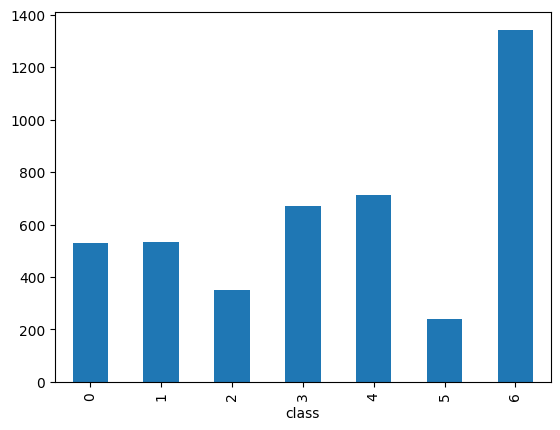

In [18]:
Human_data['class'].value_counts().sort_index().plot.bar() #Cheaking data balance

In [21]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human,
                                                    y_human,
                                                    test_size = 0.20,
                                                    random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [25]:
y_pred = classifier.predict(X_test)

cheaking model performce

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
